In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import diopy
import scanpy as sc
import random
import cosg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import anndata
%matplotlib inline


%matplotlib notebook

In [ ]:


sns.set_style("whitegrid")

import pandas as pd
import scanpy as sc

import os



save_dir ='region_anno_cellbin/cellbin_'

working_dir =  'data/cellbin_'



st_path = working_dir+read_name
save_path=save_dir+read_name
sc_data = diopy.input.read_h5(st_path)
sc_data.obs['celltype']='0'
sc_data

if 'Group1' not in sc_data.obs['group2'].cat.categories:
        new_categories = list(sc_data.obs['group2'].cat.categories) + ['Group1']
        sc_data.obs['group2'] = sc_data.obs['group2'].cat.set_categories(new_categories)
    

sc_data.obs['group2'] = sc_data.obs['group2'].fillna('Group1')

<IPython.core.display.Javascript object>


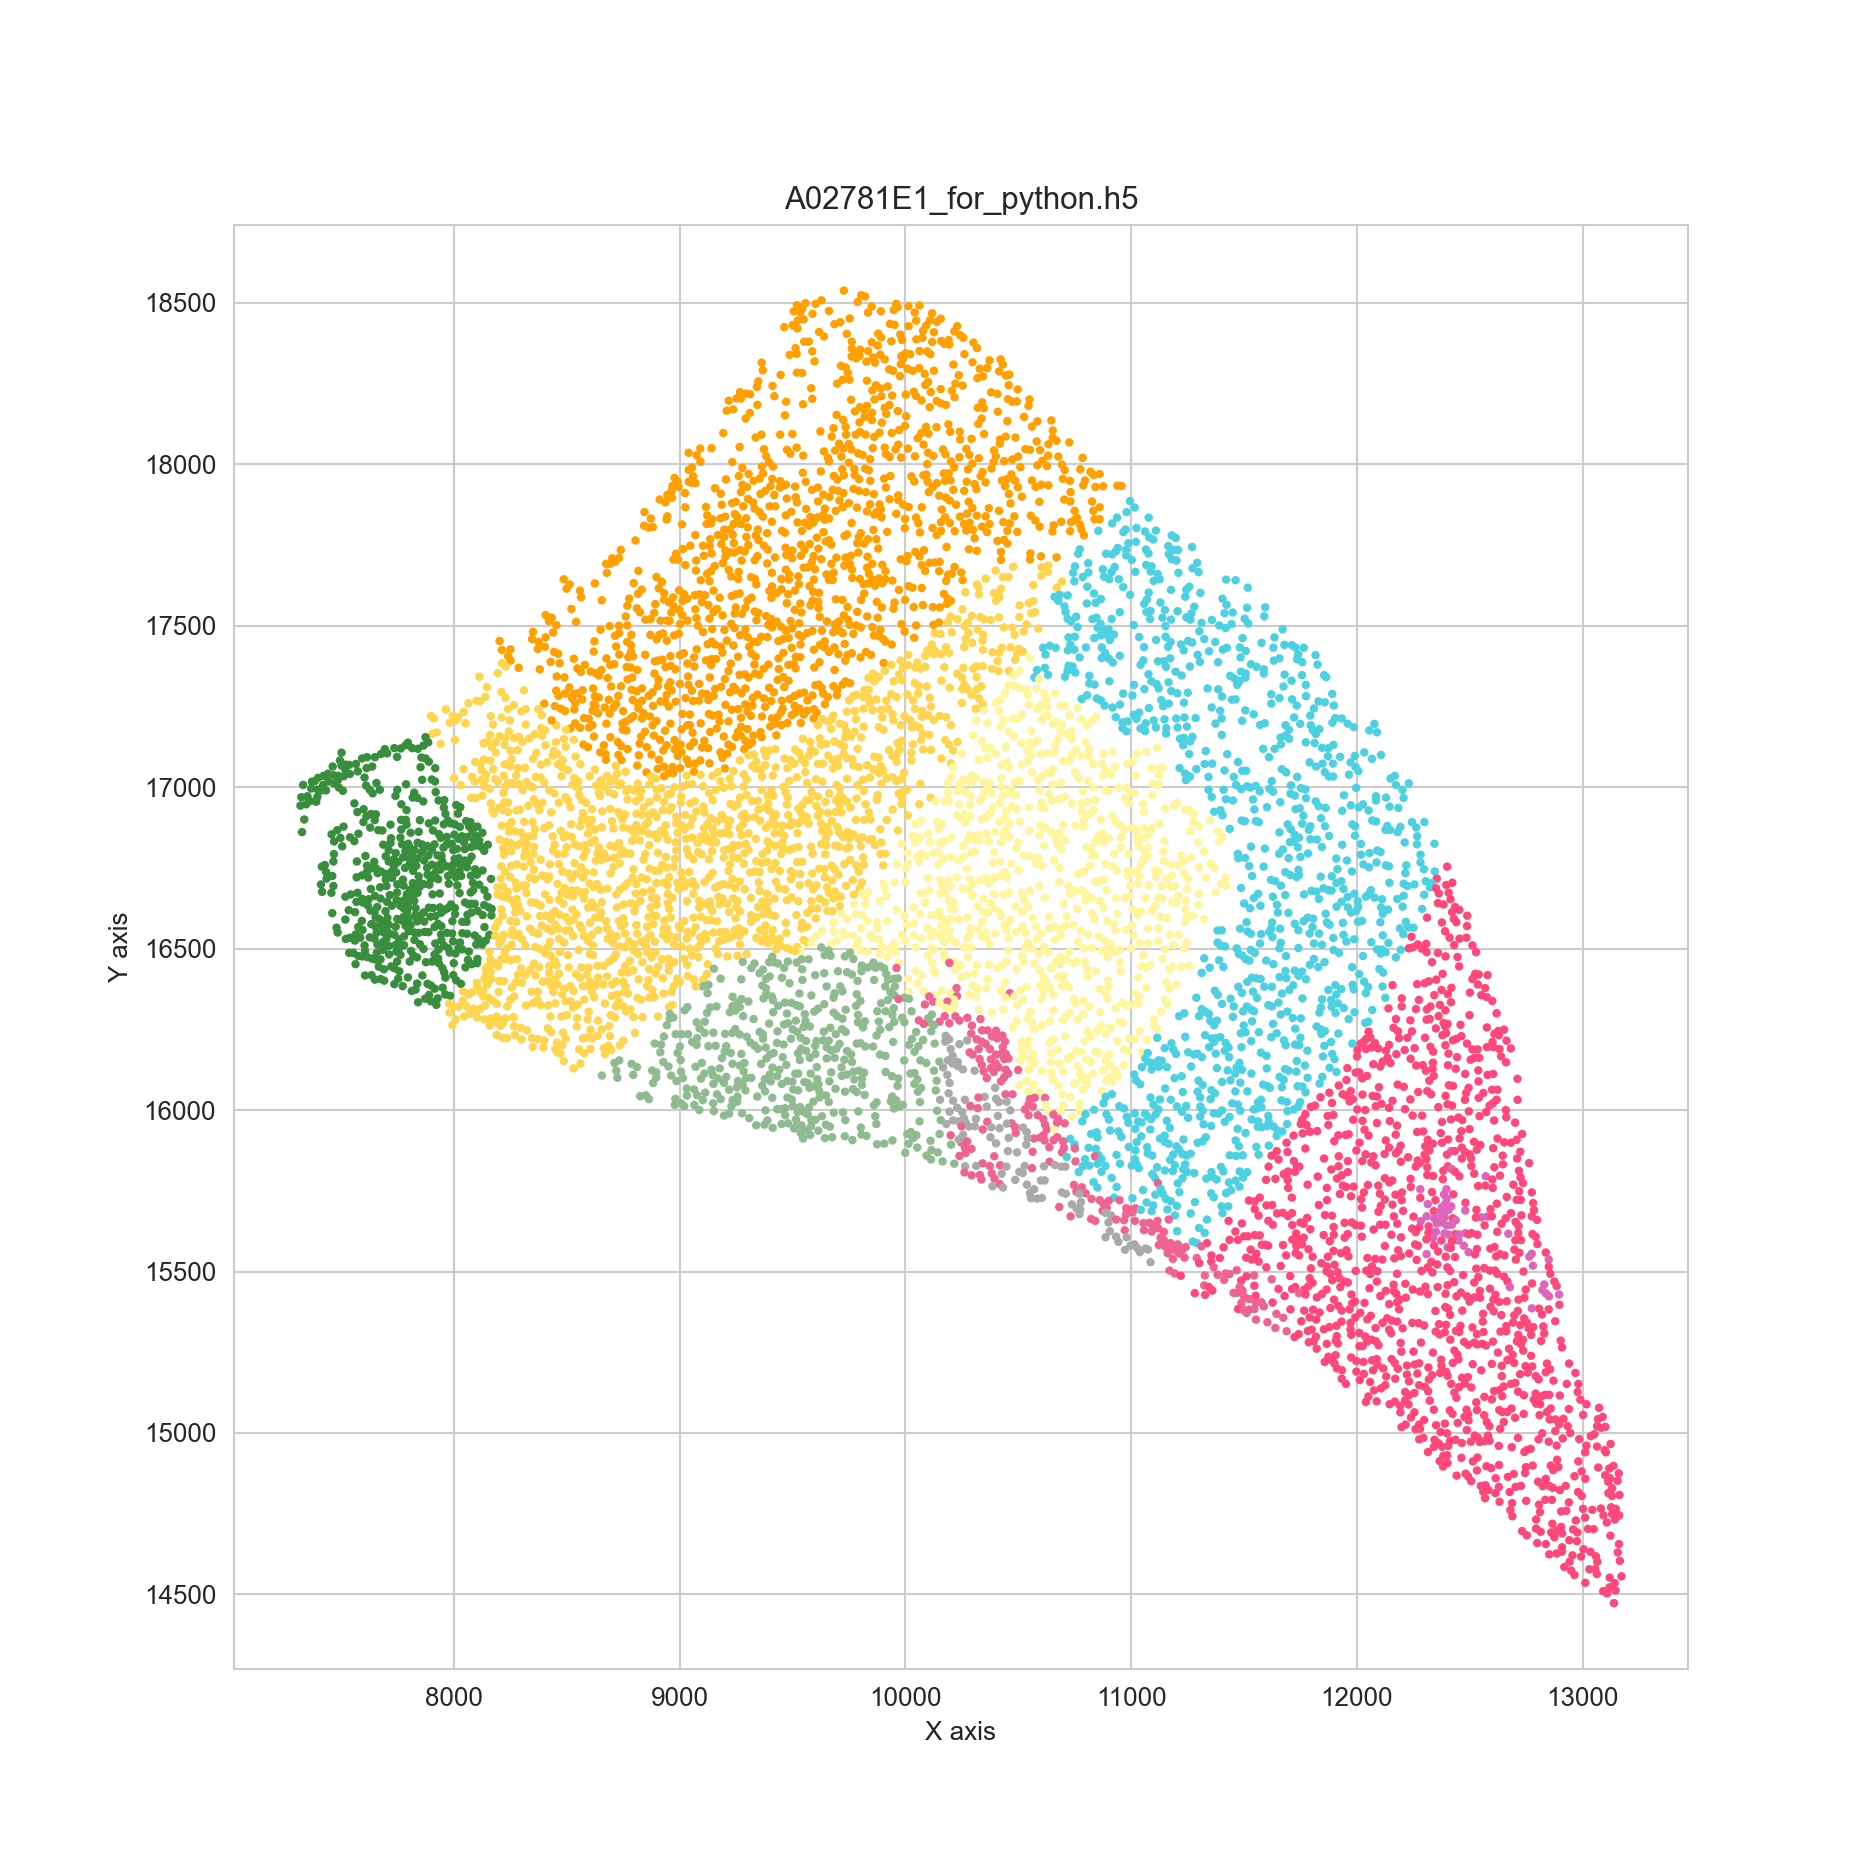

Selected data saved to 'selected_data'


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import numpy as np
import scanpy as sc

coor_x = sc_data.obs['coor_x']
coor_y = sc_data.obs['coor_y']
# predicted_labels = sc_data.obs['seurat_clusters']
predicted_labels = sc_data.obs['group2']
cell_type_to_color = {
'Group10' : "#AAAAAA", 'Group1' : "#AAAAAA", 
'Group2' : "#AAAAAA", 'Group3' :"#AAAAAA",  
'Group4' : "#AAAAAA", 'Group5' : "#AAAAAA",  
'Group6' : "#AAAAAA", 'Group8' : "#AAAAAA",  'Group7' : "#AAAAAA",  
'Unknown' : "#AAAAAA", 'Group9' : "#AAAAAA", 'Group10' : "#AAAAAA",'nan': "#AAAAAA",
'MEAPV': "#388E3C",    
'MEAPD': "#CE1256",  
'IAM': "#F06292",    
'IAL': "#DF65BA",   
'COA': "#DF9FBF",  
'BLA': "#8D6AC6",   
'MEA': "#762A83",    
'CEA': "#084594", 
'CEAL': "#00979D", 
'CEAM': "#00A809", 
'LA' : "#FF477A",
'BMAp': "#FFF59D",  'BMAa' : "#1976D2", 
'COAp' : "#FFA000", 'MEApd' : "#90BA90",  
'BA' : "#4DD0E1", 'MEAav' : "#00FF00",
'PA' : "#FFD54F", 'Group911' : "#9970AB",

}



colors = [cell_type_to_color[label] for label in predicted_labels]


colors = predicted_labels.map(cell_type_to_color)


fig, ax = plt.subplots(figsize=(10, 10))
# fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=5)
ax.set_title(read_name)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')


selected_indices = []


def onselect(verts):
    path = Path(verts)
    ind = np.nonzero(path.contains_points(np.column_stack([sc_data.obs['coor_x'], sc_data.obs['coor_y']])))
    selected_indices.extend(ind[0])  
    print("Selected points:")
    print(sc_data.obs.iloc[ind])


lasso = LassoSelector(ax, onselect)

plt.show()


selected_data = sc_data[selected_indices, :]
print("Selected data saved to 'selected_data'")


In [66]:
diopy.output.write_h5(sc_data, file = save_path)